In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\pp884\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("Hospital_Readmissions_Reduction_Program.csv")
data.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,THOMAS HOSPITAL,10100,AL,READM-30-COPD-HRRP,166,NaN,0.9502,18.4,19.3,27,01-JUL-11,30-JUN-14
1,THOMAS HOSPITAL,10100,AL,READM-30-HF-HRRP,343,NaN,0.9587,19.9,20.8,66,01-JUL-11,30-JUN-14
2,THOMAS HOSPITAL,10100,AL,READM-30-HIP-KNEE-HRRP,641,NaN,1.0221,4.9,4.8,32,01-JUL-11,30-JUN-14
3,J PAUL JONES HOSPITAL,10102,AL,READM-30-COPD-HRRP,Not Available,1.0,Not Available,Not Available,Not Available,Not Available,01-JUL-11,30-JUN-14
4,GRANDVIEW MEDICAL CENTER,10104,AL,READM-30-COPD-HRRP,239,NaN,1.0373,21.5,20.7,54,01-JUL-11,30-JUN-14


In [3]:
data.describe()

,Provider Number,Footnote
count,16585.000000,3275.000000
mean,263262.641242,2.909924
std,160656.934173,2.024018
min,10001.000000,1.000000
25%,110146.000000,1.000000
50%,250138.000000,1.000000
75%,390130.000000,5.000000
max,670099.000000,7.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16585 entries, 0 to 16584
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hospital Name               16585 non-null  object 
 1   Provider Number             16585 non-null  int64  
 2   State                       16585 non-null  object 
 3   Measure Name                16585 non-null  object 
 4   Number of Discharges        16585 non-null  object 
 5   Footnote                    3275 non-null   float64
 6   Excess Readmission Ratio    16585 non-null  object 
 7   Predicted Readmission Rate  16585 non-null  object 
 8   Expected Readmission Rate   16585 non-null  object 
 9   Number of Readmissions      16585 non-null  object 
 10  Start Date                  16585 non-null  object 
 11  End Date                    16585 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.5+ MB


In [5]:
data.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13310
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [6]:
np.shape(data)

(16585, 12)

# hospital column

In [7]:
#total different count of hospital
data["Hospital Name"].value_counts().shape

(3197,)

In [8]:
data["Number of Readmissions"].value_counts()  # many of the data is missing

Not Available        3275
Too Few to Report    2361
16                    241
13                    241
14                    231
                     ... 
390                     1
600                     1
232                     1
229                     1
388                     1
Name: Number of Readmissions, Length: 348, dtype: int64

In [9]:
data["Number of Readmissions"]=data["Number of Readmissions"].replace("Not Available",0)

In [10]:
data["Number of Readmissions"]=data["Number of Readmissions"].replace("Too Few to Report",0)

In [11]:
data["Number of Readmissions"]=data["Number of Readmissions"].astype(int)

In [12]:
data.groupby("Hospital Name")["Number of Readmissions"].mean().sort_values(ascending=False) #mean of readmission in particular hospital

Hospital Name
FLORIDA HOSPITAL                              443.8
SOUTHCOAST HOSPITAL GROUP, INC                317.6
BEAUMONT HOSPITAL, ROYAL OAK                  311.8
CHRISTIANA CARE HEALTH SERVICES, INC.         287.0
NEW YORK-PRESBYTERIAN HOSPITAL                275.0
                                              ...  
J PAUL JONES HOSPITAL                           0.0
IRWIN COUNTY HOSPITAL                           0.0
INTEGRIS HEALTH EDMOND                          0.0
IDAHO DOCTORS HOSPITAL                          0.0
ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER      0.0
Name: Number of Readmissions, Length: 3197, dtype: float64

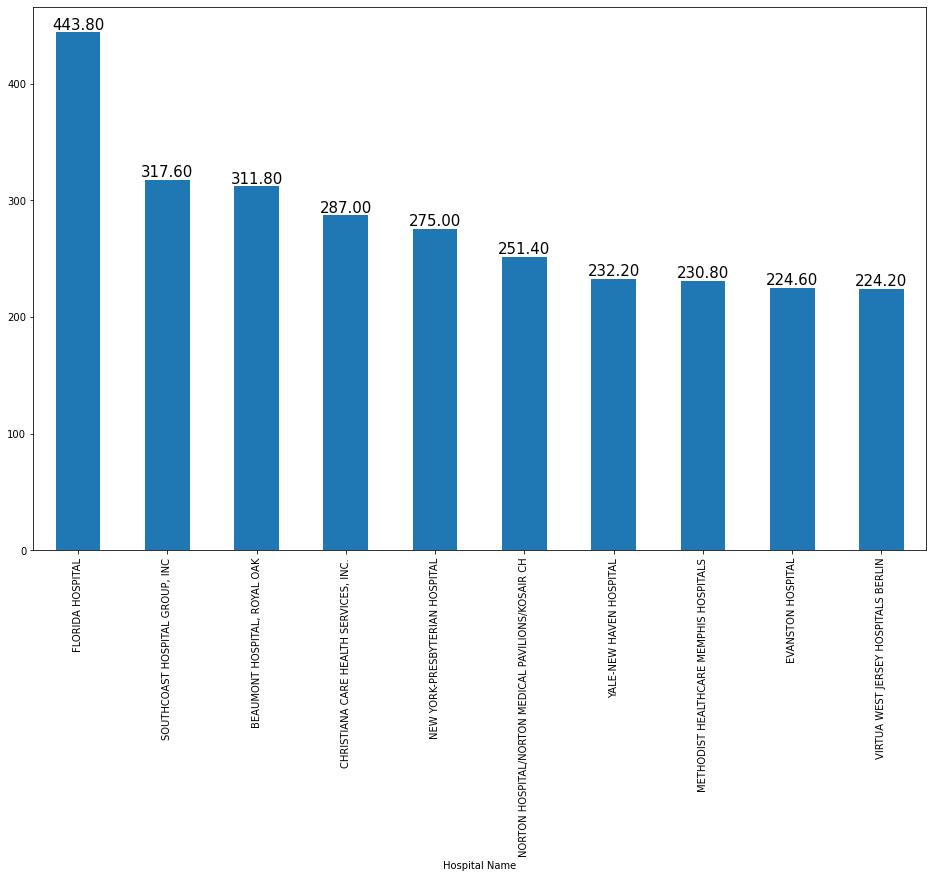

In [13]:
plt.figure(figsize=(16,10))
plots=data.groupby("Hospital Name")["Number of Readmissions"].mean().sort_values(ascending=False)[:10].plot(kind="bar")
for bar in plots.patches:  
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [14]:
data["Number of Discharges"].value_counts()

Not Available    5549
0                  87
160                39
115                37
136                37
                 ... 
2673                1
1156                1
1304                1
1623                1
1826                1
Name: Number of Discharges, Length: 1266, dtype: int64

In [15]:
data["Number of Discharges"]=data["Number of Discharges"].replace("Not Available",0)

In [16]:
data.groupby("Hospital Name")["Number of Readmissions"].mean().sort_values(ascending=False)

Hospital Name
FLORIDA HOSPITAL                              443.8
SOUTHCOAST HOSPITAL GROUP, INC                317.6
BEAUMONT HOSPITAL, ROYAL OAK                  311.8
CHRISTIANA CARE HEALTH SERVICES, INC.         287.0
NEW YORK-PRESBYTERIAN HOSPITAL                275.0
                                              ...  
J PAUL JONES HOSPITAL                           0.0
IRWIN COUNTY HOSPITAL                           0.0
INTEGRIS HEALTH EDMOND                          0.0
IDAHO DOCTORS HOSPITAL                          0.0
ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER      0.0
Name: Number of Readmissions, Length: 3197, dtype: float64

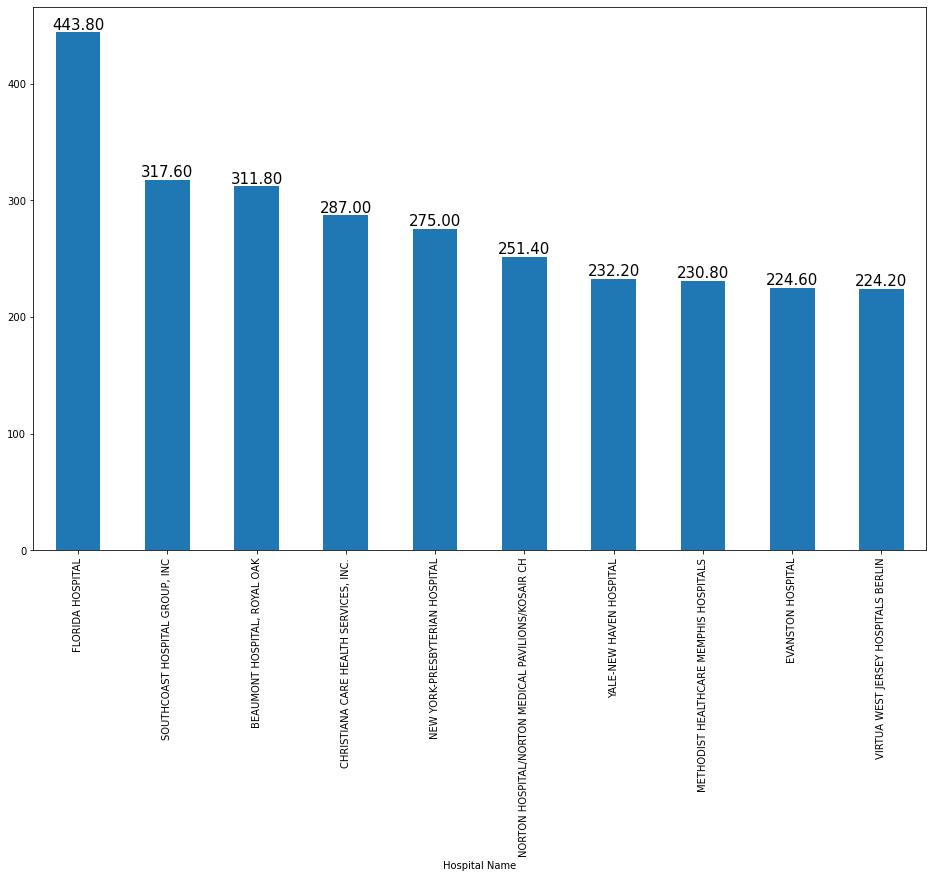

In [17]:
plt.figure(figsize=(16,10))
plots=data.groupby("Hospital Name")["Number of Readmissions"].mean().sort_values(ascending=False)[:10].plot(kind="bar")
for bar in plots.patches:  
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [18]:
data["State"].value_counts()

TX    1540
CA    1480
FL     845
NY     780
PA     755
OH     655
IL     630
GA     510
MI     470
LA     470
TN     460
OK     455
IN     425
NC     420
AL     415
VA     375
MO     370
WI     330
NJ     320
MS     320
KY     320
AZ     315
MA     285
SC     265
KS     260
MN     250
WA     245
CO     235
MD     235
AR     225
OR     170
IA     170
UT     165
NM     160
CT     150
WV     145
NE     120
NV     110
SD     110
ME      85
ID      70
NH      65
MT      65
HI      60
RI      55
WY      50
ND      40
AK      40
DC      35
VT      30
DE      30
Name: State, dtype: int64

In [19]:
data["Measure Name"]=data["Measure Name"].str.split("READM-30-").str[1]   #showing disease

In [20]:
data["Measure Name"].value_counts()

COPD-HRRP        3317
HF-HRRP          3317
HIP-KNEE-HRRP    3317
PN-HRRP          3317
AMI-HRRP         3317
Name: Measure Name, dtype: int64

In [21]:
data.groupby("Measure Name")["Number of Readmissions"].mean()

Measure Name
AMI-HRRP         22.905638
COPD-HRRP        50.473018
HF-HRRP          70.722942
HIP-KNEE-HRRP    10.604763
PN-HRRP          44.820923
Name: Number of Readmissions, dtype: float64

In [22]:
l=data.groupby("Measure Name")["Number of Readmissions"].mean().reset_index()
l

,Measure Name,Number of Readmissions
0,AMI-HRRP,22.905638
1,COPD-HRRP,50.473018
2,HF-HRRP,70.722942
3,HIP-KNEE-HRRP,10.604763
4,PN-HRRP,44.820923


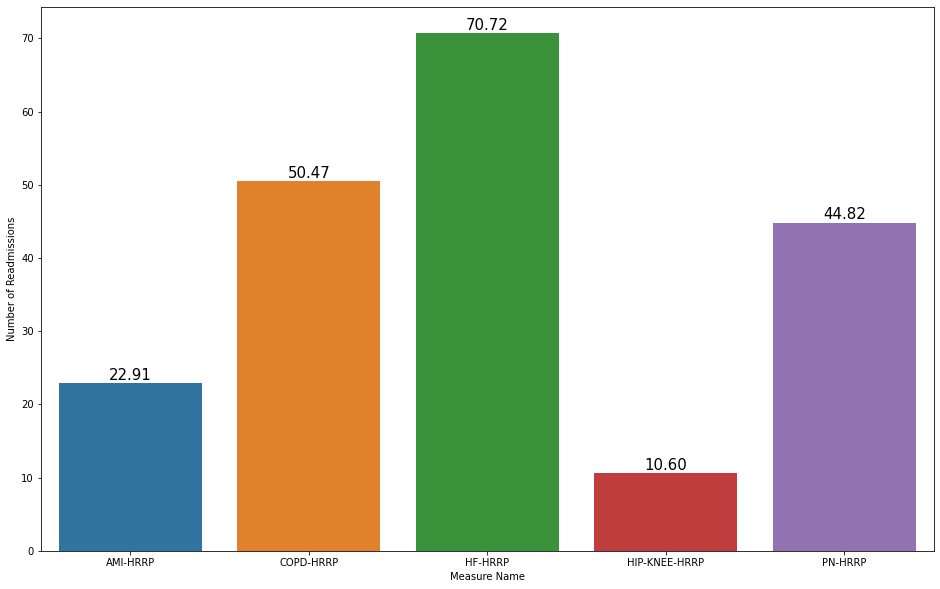

In [23]:
plt.figure(figsize=(16,10))
plots=sns.barplot(x=l["Measure Name"],y=l["Number of Readmissions"])
for bar in plots.patches:  
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

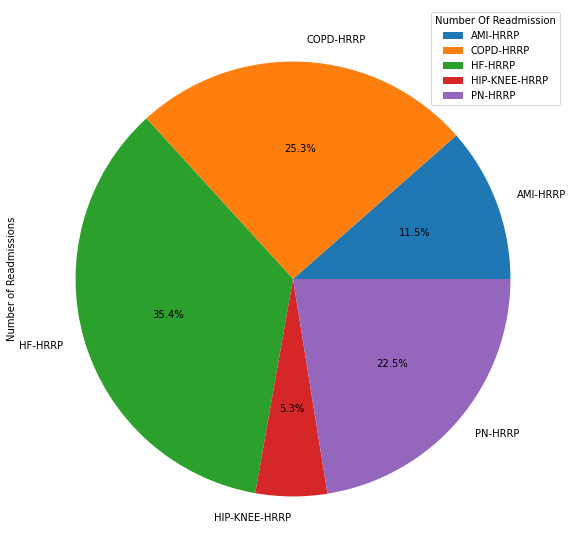

In [83]:
#pie chart for above graph and data
plt.figure(figsize=(16,10))
data.groupby("Measure Name")["Number of Readmissions"].mean().plot(kind="pie",autopct="%1.1f%%")
plt.legend(title="Number Of Readmission",loc="upper right")

In [24]:
data["Number of Discharges"].dtypes

dtype('O')

In [25]:
data["Number of Discharges"]=data["Number of Discharges"].astype(int)

In [26]:
dis=data.groupby("Measure Name")["Number of Discharges"].mean().reset_index()
dis

,Measure Name,Number of Discharges
0,AMI-HRRP,137.687971
1,COPD-HRRP,248.042207
2,HF-HRRP,322.851673
3,HIP-KNEE-HRRP,220.552005
4,PN-HRRP,261.854989


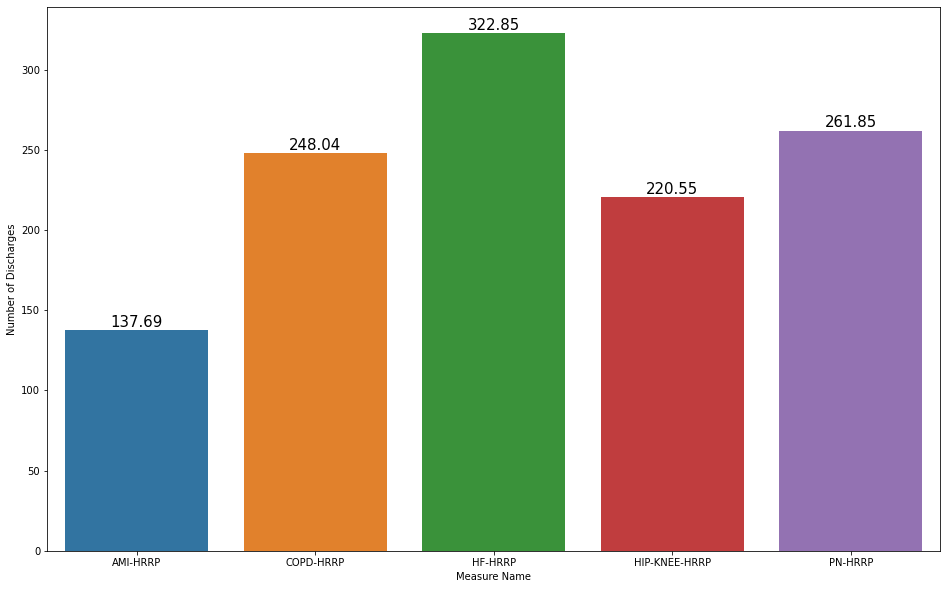

In [27]:
plt.figure(figsize=(16,10))
plots=sns.barplot(x=dis["Measure Name"],y=dis["Number of Discharges"])


for bar in plots.patches:  
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

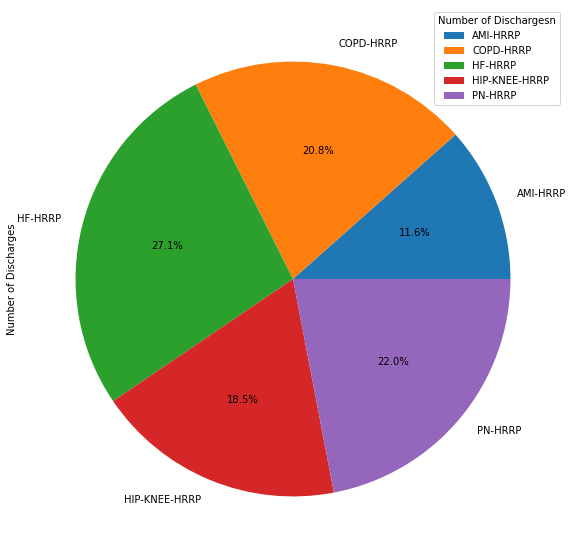

In [82]:
#pie chart for above graph and data
plt.figure(figsize=(16,10))
data.groupby("Measure Name")["Number of Discharges"].mean().plot(kind="pie",autopct="%1.1f%%")
plt.legend(title="Number of Dischargesn",loc="upper right")

In [28]:
data["Predicted Readmission Rate"].value_counts()

Not Available    3275
19.7              153
17.7              151
18.4              150
19.3              146
                 ... 
29.5                1
29.6                1
28.4                1
29.1                1
30.2                1
Name: Predicted Readmission Rate, Length: 262, dtype: int64

In [29]:
data["Predicted Readmission Rate"]=data["Predicted Readmission Rate"].replace("Not Available",0)

In [30]:
data["Expected Readmission Rate"].value_counts()

Not Available    3275
4.8               214
4.7               210
4.9               205
5.0               182
                 ... 
26.0                1
26.8                1
7.1                 1
3.2                 1
12.0                1
Name: Expected Readmission Rate, Length: 197, dtype: int64

In [31]:
data["Expected Readmission Rate"]=data["Expected Readmission Rate"].replace("Not Available",0)

In [32]:
data["Number of Readmissions"]=data["Number of Readmissions"].astype(float)

In [33]:
data["Predicted Readmission Rate"]=data["Predicted Readmission Rate"].astype(float)

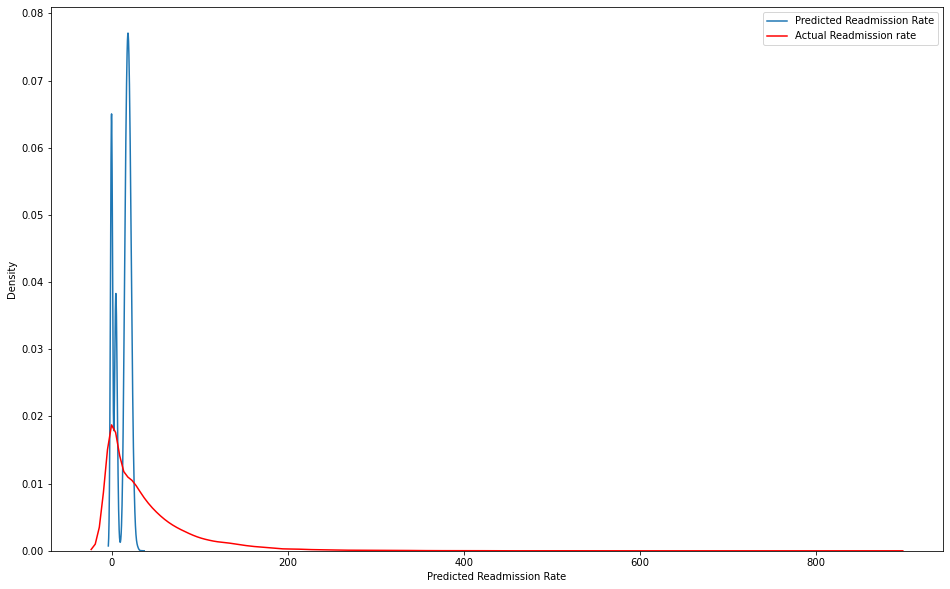

In [34]:
plt.figure(figsize=(16,10))
sns.kdeplot(data["Predicted Readmission Rate"],label="Predicted Readmission Rate")
sns.kdeplot(data["Number of Readmissions"],color="red",label="Actual Readmission rate")   #almost same
plt.legend()

In [35]:
data["Expected Readmission Rate"]=data["Expected Readmission Rate"].astype(float)

<AxesSubplot:xlabel='Expected Readmission Rate', ylabel='Predicted Readmission Rate'>

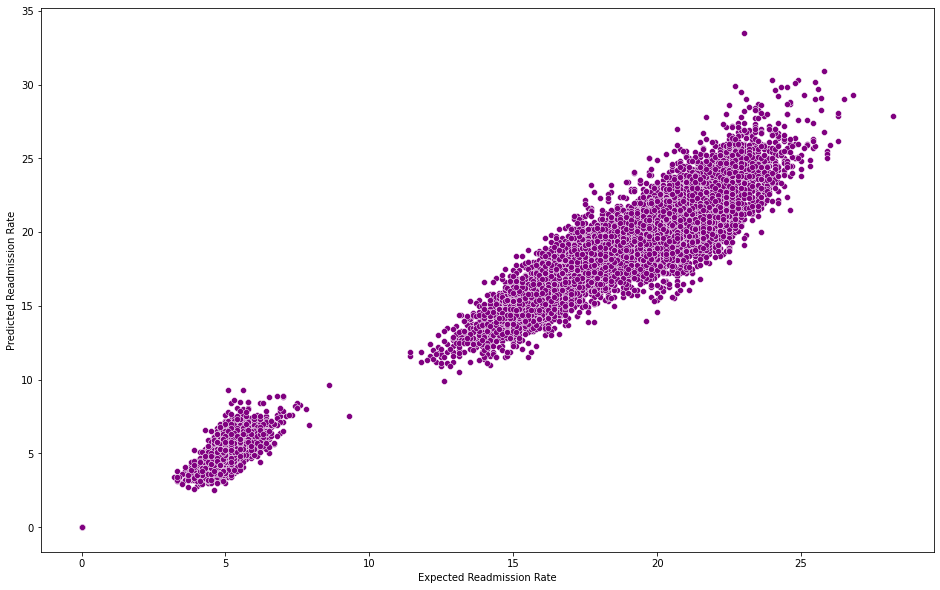

In [36]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=data["Expected Readmission Rate"], y=data["Predicted Readmission Rate"], color='purple')


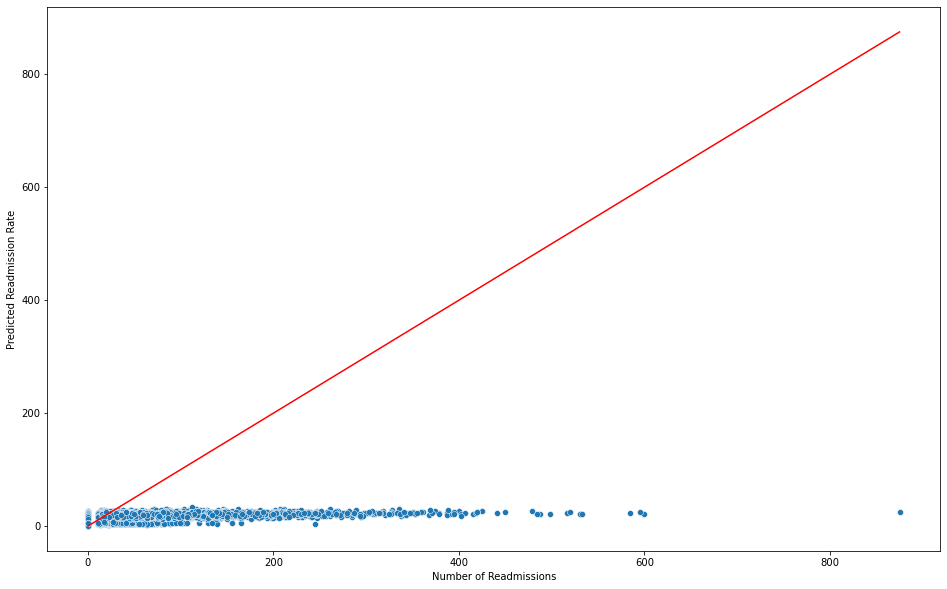

In [37]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=data["Number of Readmissions"],y=data["Predicted Readmission Rate"])
plt.plot([data['Number of Readmissions'].min(), data['Number of Readmissions'].max()],
         [data['Number of Readmissions'].min(), data['Number of Readmissions'].max()],
         color='red')
#scatter show relation bw re and pre
#if perfect prediction will be there than point will align with the line 
#these shows error

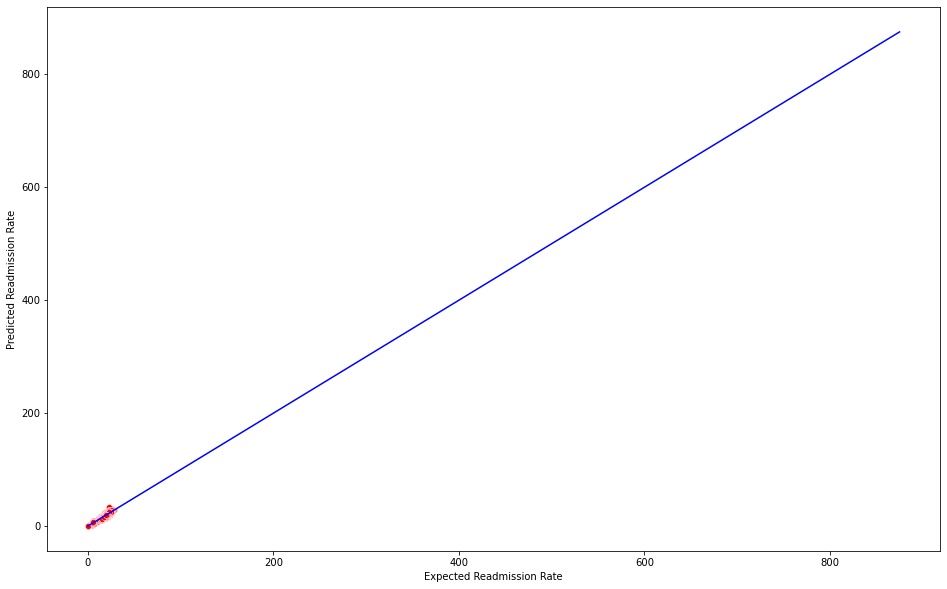

In [38]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=data["Expected Readmission Rate"],y=data["Predicted Readmission Rate"],color="red")
plt.plot([data['Number of Readmissions'].min(), data['Number of Readmissions'].max()],
         [data['Number of Readmissions'].min(), data['Number of Readmissions'].max()],
         color='blue')

<AxesSubplot:>

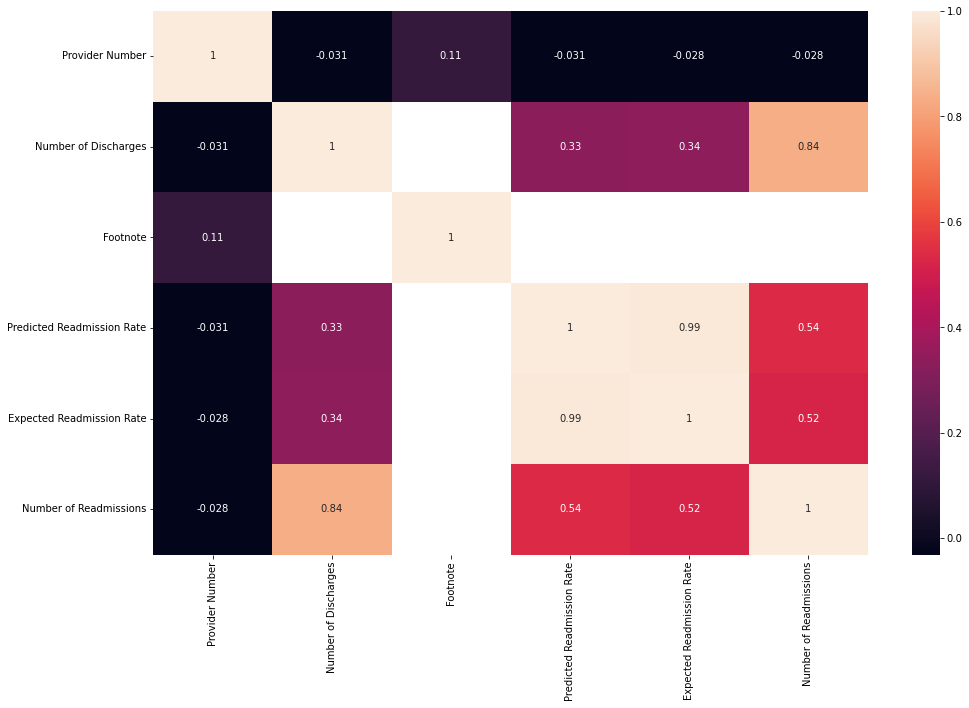

In [39]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True)

In [40]:
data.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

C:\Users\pp884\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of Discharges'>

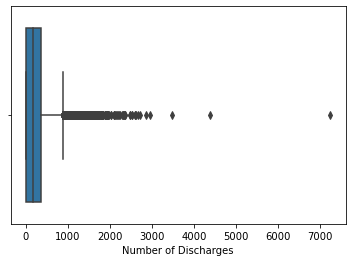

In [41]:
sns.boxplot(data["Number of Discharges"])

C:\Users\pp884\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Predicted Readmission Rate'>

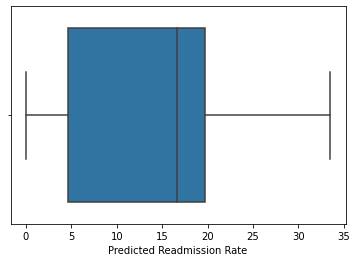

In [42]:
sns.boxplot(data["Predicted Readmission Rate"])

In [43]:
data["Expected Readmission Rate"]=data["Expected Readmission Rate"].astype(float)

<AxesSubplot:xlabel='Expected Readmission Rate'>

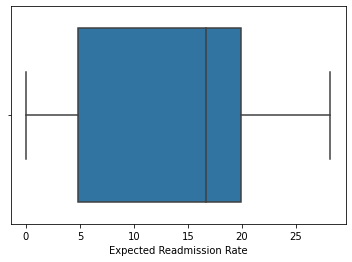

In [44]:
sns.boxplot(x=data["Expected Readmission Rate"])

C:\Users\pp884\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of Readmissions'>

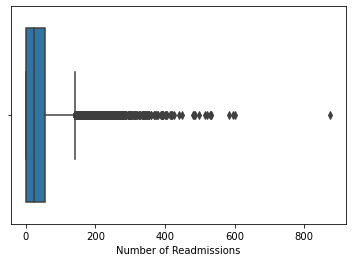

In [45]:
sns.boxplot(data["Number of Readmissions"])

In [46]:
read=data.groupby(["Measure Name","State"])["Number of Readmissions"].sum().sort_values(ascending=False).iloc[:20].reset_index()
read   #for each state highest number of measure with  readmission rate

,Measure Name,State,Number of Readmissions
0,HF-HRRP,FL,19647.0
1,HF-HRRP,CA,16080.0
2,HF-HRRP,TX,15793.0
3,HF-HRRP,NY,15526.0
4,COPD-HRRP,FL,14753.0
5,HF-HRRP,IL,13023.0
6,HF-HRRP,PA,12384.0
7,HF-HRRP,MI,11009.0
8,COPD-HRRP,TX,10895.0
9,PN-HRRP,FL,10697.0


In [47]:
disch=data.groupby(["Measure Name","State"])["Number of Discharges"].sum().sort_values(ascending=False).iloc[:20].reset_index()
disch  #for each state highest number of measure name with discharge

,Measure Name,State,Number of Discharges
0,HF-HRRP,FL,84166
1,HF-HRRP,TX,74288
2,HF-HRRP,CA,72571
3,COPD-HRRP,FL,72061
4,PN-HRRP,TX,64528
5,HF-HRRP,NY,63944
6,PN-HRRP,FL,61028
7,PN-HRRP,CA,59848
8,HF-HRRP,IL,58704
9,HIP-KNEE-HRRP,FL,58054


In [48]:
#state wise readmission avg
stat_read=data.groupby("State")["Number of Readmissions"].mean().reset_index()
stat_read

,State,Number of Readmissions
0,AK,13.225000
1,AL,34.245783
2,AR,39.942222
3,AZ,28.330159
4,CA,29.673649
5,CO,16.476596
6,CT,65.646667
7,DC,51.142857
8,DE,100.833333
9,FL,64.766864


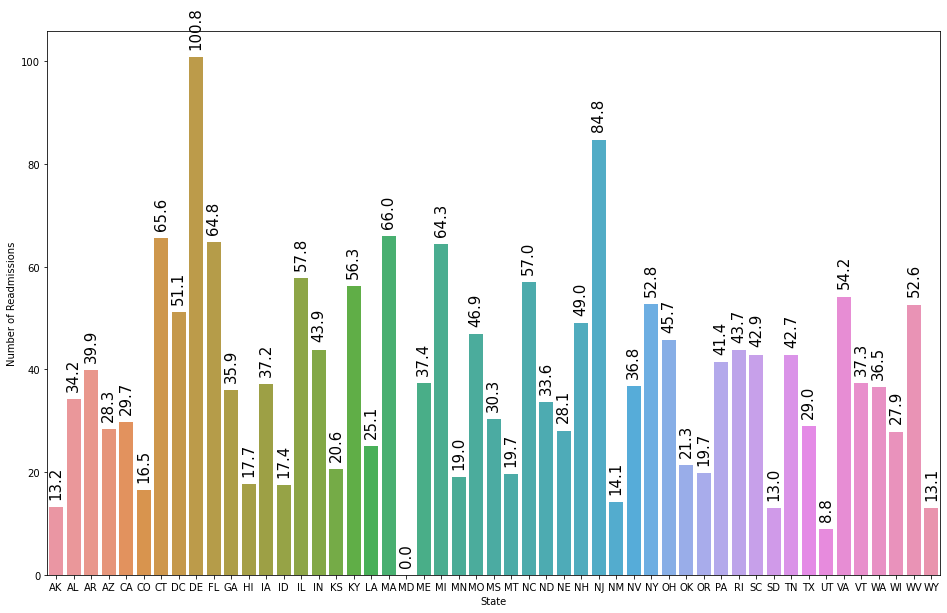

In [49]:
plt.figure(figsize=(16,10))
plots=sns.barplot(x=stat_read["State"],y=stat_read["Number of Readmissions"])
for bar in plots.patches:  
    plots.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='bottom',
                   size=15, xytext=(0, 8),
                   textcoords='offset points',rotation=90)

In [56]:
from sklearn.metrics import mean_absolute_error

print("Mean Absolute error for expected and predicted Readmission Rate:",mean_absolute_error(data["Number of Readmissions"],data["Predicted Readmission Rate"]))

Mean Absolute error for expected and predicted Readmission Rate: 30.571214953271028


In [57]:
import scipy.stats as stats

In [70]:
#statistic for predicted readmission
print("For Predicted Readmission")
print(data["Predicted Readmission Rate"].mean())
print(data["Predicted Readmission Rate"].std())

#for number od readmission
print("For Number of readmission")
print(data["Number of Readmissions"].mean())
print(data["Number of Readmissions"].std())

For Predicted Readmission
13.107699728670442
8.468358884196414
For Number of readmission
39.90545673801628
53.813196257271


In [73]:
#t- test for actual and predicted
#H0=there is no difference between actual and predicted readmission
#H1=there is a difference between actual and predicted value

#t-test using scipy library
t_value,p_value=stats.ttest_rel(data["Number of Readmissions"],data["Predicted Readmission Rate"])
print("T_Value :",t_value)
print("p_value :",p_value)

if(p_value < .05):
    print("Reject the Null Hypothesis ")
else:
    print("Accept the Null Hypothesis")


T_Value : 69.31851748508791
p_value : 0.0
Reject the Null Hypothesis 


In [74]:
# since the p value is less than 0.05 than we will reject the null hypothesis so we can see
#that there is a difference between actual and predicted value